In [40]:
from graphviz import Digraph, Graph

class Matrix:
    
    def __init__(self, relation, name="", highlight_relation=dict(), highlight_domain=dict(), highlight_codomain=dict()):
        self._relation = relation
        self._name = name
        self._highlight_relation = highlight_relation
        self._highlight_domain= highlight_domain
        self._highlight_codomain= highlight_codomain
        
    def get_relation(self):
        return self._relation
    
    def set_relation(self, relation):
        self._relation = relation
        
    def get_name(self):
        return self._name
    
    def set_name(self, name):
        self._name = name
        
    def get_highlight_relation(self):
        return self._highlight_relation
    
    def set_highlight_relation(self, highlight_relation):
        self._highlight_relation = highlight_relation
        
    def get_highlight_domain(self):
        return self._highlight_domain
    
    def set_highlight_domain(self, highlight_domain):
        self._highlight_domain = highlight_domain
        
    def get_highlight_codomain(self):
        return self._highlight_codomain
    
    def set_highlight_codomain(self, highlight_codomain):
        self._highlight_codomain = highlight_codomain
        
    def create_matrix(self):
        matrix, dom, codom = self.get_relation().matrix_representation()
        m = "<<TABLE color=\"white\">"
        m += self.new_header(codom)      
        for i in range(len(matrix)):
            m += self.new_row(matrix[i], dom[i], codom)           
        m += f"<TR><TD colspan=\"{len(matrix)+1}\">{self.get_name()}</TD></TR></TABLE>>"
        return m 
    
    def new_header(self, codom):
        header = "<TR><TD color=\"white\"></TD>"
        for x in codom:
            if x in self.get_highlight_codomain().keys():
                header += f"<TD bgcolor=\"{self.get_highlight_codomain()[x]}\">{x}</TD>"
            else:
                header += f"<TD color=\"white\">{x}</TD>"
        header += "</TR>"      
        return header
            
    def new_row(self, values, x_dom, codom):              
        if x_dom in self.get_highlight_domain().keys():
            row = f"<TR><TD bgcolor=\"{self.get_highlight_domain()[x_dom]}\">{x_dom}</TD>"
        else:
            row = f"<TR><TD color=\"white\">{x_dom}</TD>" 
        for i in range(len(codom)):
            if (x_dom, codom[i]) not in self.get_highlight_relation().keys():
                row += f"<TD color=\"black\">{values[i]}</TD>"
            else:
                row += f"<TD color=\"black\" bgcolor=\"{self.get_highlight_relation()[(x_dom, codom[i])]}\">{values[i]}</TD>"           
        row += "</TR>"
        return row

class MatrixGraph:
    
    def __init__(self, name="", *matrices):
        self._name = name
        self._matrices = matrices
        
    def get_name(self):
        return self._name
    
    def set_name(self, name):
        self._name = name
        
    def get_matrices(self):
        return self._matrices
    
    def set_matrices(self, *matrices):
        self._matrices = matrices
        
    def create_matrix_graph(self):
        g = Graph(node_attr={'shape': 'none'})  
        g.body.append(f"label=\"{self.get_name()}\"")     
        for matrix in self.get_matrices():
            g.node(matrix.get_name(), label=f'{matrix.create_matrix()}')
        return g
 

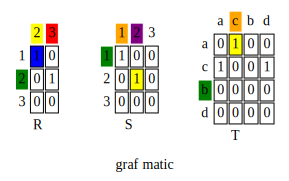

In [39]:
#%run partialOrder.ipynb

# relation1 = BinaryRelation({(1,2),(2,3)},{1,2,3},{2,3}, True)
# matrix1 = Matrix(relation1,'R', {(1,2):"blue"},{2:"green"},{2:"yellow",3:"red"})

# relation2 = BinaryRelation({(1,1),(2,2)},{1,2,3},{1,2,3}, True)
# matrix2 = Matrix(relation2,'S', {(2,2):"yellow"},{1:"green"},{1:"orange",2:"purple"})

# relation3 = HomogeneousRelation({('a','c'),('c','a'),('c','d')},{'a','b','c','d'}, True)
# matrix3 = Matrix(relation3,'T', {('a','c'):"yellow"},{'b':"green"},{'c':"orange"})


# matrix_graph = MatrixGraph("graf matic", matrix1, matrix2, matrix3)
# display(matrix_graph.create_matrix_graph())